In [3]:
import pandas as pd
import numpy as np
import scipy
import scipy.misc

# Matplotplib

* matplotlib is *the* plotting library for python
* a lot of the other python plotting libraries are based on it, e.g., pandas plotting and seaborn
* (partly) modelled after matlab
* most important module is `matplotlib.pyplot`, canonically imported as `plt`
* in jupyter notebooks magic function `%matplotlib inline` makes matplotlib plots appear in the notebook
* differentt plots kind be combined in one *image*


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Basic API
modelled after Matlab

* basic plotting with functions such as `plt.plot()`, `plt.scatter()`, `plt.hist()`, `plt.boxplot()`

In [10]:
y = np.cumsum(np.random.rand(100) - 0.5)
y

array([ 0.47572092,  0.48783762,  0.19554982,  0.66969625,  0.2403048 ,
        0.61097359,  1.08018622,  0.75122335,  1.03049081,  1.39543912,
        1.74318349,  1.60509443,  1.30519316,  0.81128685,  0.40975989,
        0.59650933,  0.78880215,  0.8658039 ,  1.16322315,  1.53968095,
        1.17479454,  1.13093192,  0.78235181,  0.61918509,  0.76154081,
        0.48836226,  0.25374814, -0.14797415,  0.15556671,  0.34097696,
        0.48191553,  0.16487524, -0.09427383, -0.21029429,  0.10829493,
        0.04070321,  0.41966501,  0.7066121 ,  1.01272563,  1.04996208,
        1.53006588,  1.23001871,  1.51633963,  1.41707596,  1.34212652,
        0.99136852,  0.50422621,  0.5027436 ,  0.6154819 ,  0.60835914,
        0.22782366,  0.53820036,  0.24131621,  0.01037795, -0.04458763,
       -0.06940608, -0.0494398 ,  0.12050967,  0.26011712,  0.45625339,
        0.8676844 ,  0.88343786,  0.48392029,  0.90686866,  1.09822243,
        0.9801191 ,  1.05416224,  1.16534219,  1.63637336,  1.26

<IPython.core.display.Javascript object>


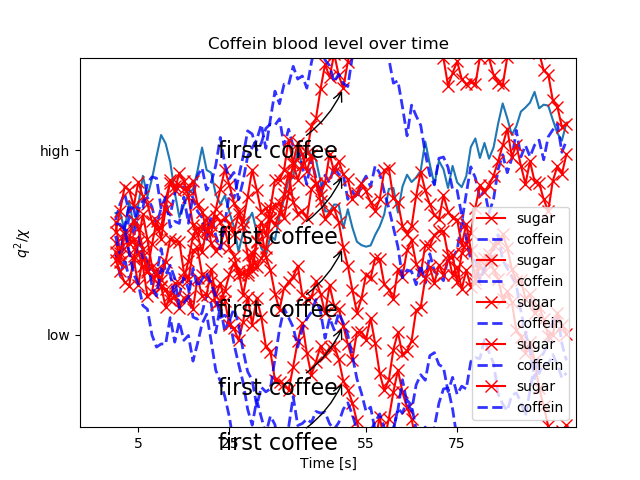

In [12]:
plt.plot(y)

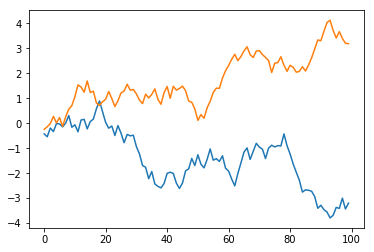

In [6]:
a = np.cumsum(np.random.rand(100) - 0.5)
b = np.cumsum(np.random.rand(100) - 0.5)

plt.plot(a)
plt.plot(b);

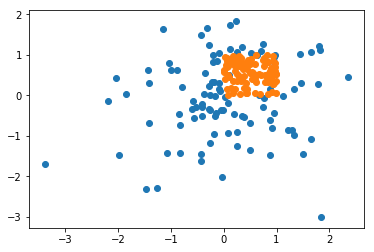

In [12]:
plt.scatter(np.random.normal(size=100), np.random.normal(size=100))
plt.scatter(np.random.random(100), np.random.random(100));

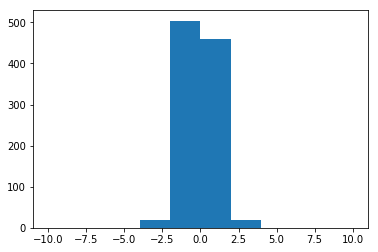

In [15]:
a = np.random.normal(size=1000)
plt.hist(a, range=(-10, 10));

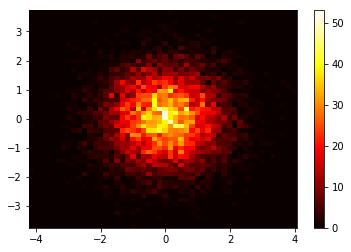

In [17]:
plt.hist2d(
    np.random.normal(size=10000),
    np.random.normal(size=10000),
    bins=50, 
    cmap='hot',
)
plt.colorbar();

In [22]:
scipy.misc.face()[:,:,0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

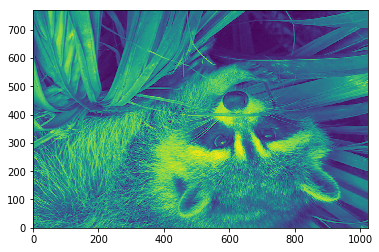

In [23]:
plt.pcolormesh(scipy.misc.face()[:,:,0]);

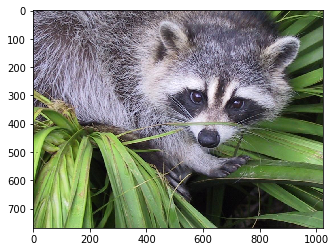

In [24]:
plt.imshow(scipy.misc.face());

* plots can be customized in a lot of different ways
* titles, ticks, labels, also
* latex (like) math mode supported (can even use real LaTeX)

* changing `color`, `linewidth` and `linestyle` 
* setting limits `.xlim()`, `.ylim()`, ticks and ticklabels
* adding labels and a legend
* annotating points

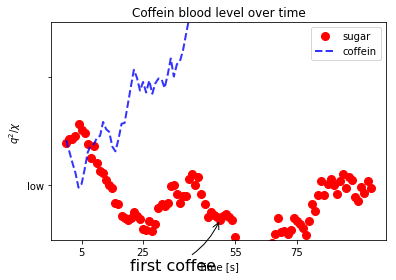

In [11]:
data1 = np.cumsum(np.random.rand(100) - 0.5)
data2 = np.cumsum(np.random.rand(100) - 0.5)

plt.plot(data1, label='sugar', color='red', marker='o', linewidth=0, markersize=8)
plt.plot(data2, label='coffein', color='blue', linestyle='--', alpha=0.8, linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel(r'$q^2/\chi$')
plt.title('Coffein blood level over time')
plt.ylim(-3, 3)
plt.xticks([5, 25, 55, 75])
plt.yticks([-1.5, 1.5], ['low'])
plt.legend()
plt.annotate(r'first coffee',
             xy=(50, data1[50]), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
#plt.show()
plt.savefig('coffein.pdf', transparent=True, dpi=300)

In [13]:
!open coffein.pdf

* some plots support the `c` color keyword

In [ ]:
plt.scatter(data1, data2, c=np.arange(0, 100), cmap='hot')
plt.colorbar();

## Figures and Axes
* until now we have been looking at the high level API
* now looking at the "object oriented" API
* most (all?) functions in one API have a corresponding function in the other
* whole plotable area is called a *Figure*, created with `plt.figure()`
* a plot in it is called an *Axes*, created with `Figure.add_subplot()` or `Figure.add_axes()`
* there can be more than one Axes in a Figure
* Axes objects support all the plot functions from above (but the customization *functions* such as `.ylims()` are different)


* Customization via:

   + `ax.set(title="A title", xlabel="x", ylabel="y")`
   + `ax.set_xlabel('label')`
   + `ax.set_xlim(from, to)`
   + `ax.set_ylim(from, to)`
   + `ax.set_title('title')`
   + ...


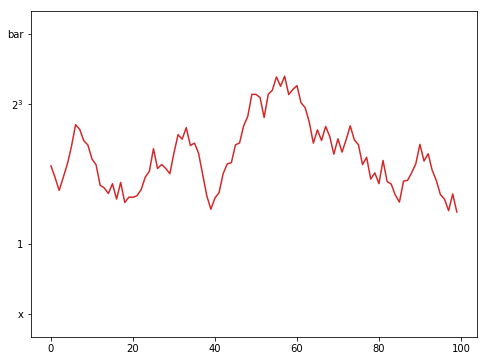

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(np.cumsum(np.random.rand(100) - 0.5), color='C3')
ax.set_ylim(-3.5, 3.5)
ax.set_yticks([-3, -1.5, 1.5, 3])
ax.set_yticklabels(['x', 1, '$2^3$', 'bar']);

* `add_subplots(abc)`, short for `a, b, c`, arguments are `a`: number of rows, `b`: number of columns, `c`: the number of the subplot
* `add_axes([a, b, c, d])` with `[a, b, c, d]`: [*left*, *bottom*, *width*, *height*]
* `gridspec` is a more powerfull alternative

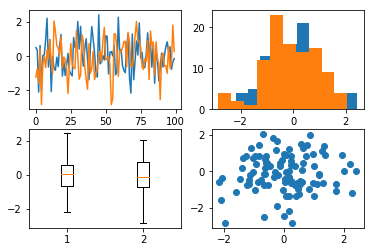

In [15]:
data1 = np.random.normal(size=100)
data2 = np.random.normal(size=100)

fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(data1)
ax.plot(data2)

ax = fig.add_subplot(222)
ax.hist(data1)
ax.hist(data2)

ax = fig.add_subplot(223)
ax.boxplot([data1, data2])

ax = fig.add_subplot(224)
ax.scatter(data1, data2);

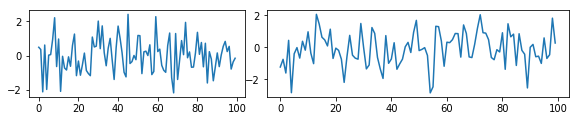

In [18]:
fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.5, 0.3])
ax.plot(data1)

ax = fig.add_axes([0.7, 0.1, 0.7, 0.3])
ax.plot(data2);

* personal favorite `fig, axx = plt.subplots(number_rows, number_columns)`
* axx is a numpy array
* if trouble with spacing, `fig.tight_layout()` mostly fixes it

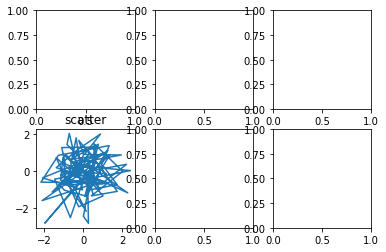

In [19]:
fig, axx = plt.subplots(2, 3)
axx[1, 0].plot(data1, data2)
axx[1, 0].set_title('scatter');

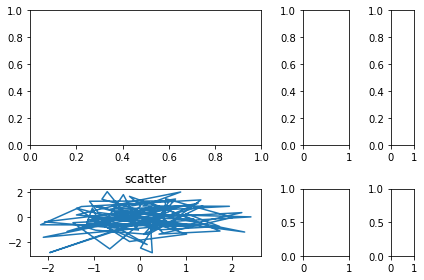

In [20]:
fig, axx = plt.subplots(2, 3, gridspec_kw = {'width_ratios':[10, 2, 1], 'height_ratios': [2, 1]})
axx[1, 0].plot(data1, data2)
axx[1, 0].set_title('scatter')
fig.tight_layout();

* you can customize everything, important if you don't like the defaults
* all plots return objects you can modify

In [ ]:
plt.boxplot([data1, data2]);

In [ ]:
boxplots = plt.boxplot([data1, data2], patch_artist=True)
boxplots['boxes'][0].set_color('green')
boxplots['boxes'][1].set_color('orange')
boxplots['medians'][0].set_color('white');

<div class="alert alert-success">
    <b>EXERCISE:</b> Try to replicate the following plot with the following data (hint: look up `plt.fill_between()`) with the following data:
</div>
<img src="files/fillbetween1.png",width=400,height=300>

In [ ]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
Y = np.sin(2 * X)

In [ ]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
Y = np.sin(2 * X)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y + 1, color='blue', alpha=.25)

plt.plot(X, Y - 1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y - 1, (Y - 1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y - 1, (Y - 1) < -1, color='red',  alpha=.25)

plt.xlim(-np.pi, np.pi)
plt.xticks(
    [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    [r'$-\pi$',  r'$-\pi/2$',  r'$0$',  r'$\pi/2$',  r'$\pi$'],
)
plt.ylim(-2.5, 2.5)
plt.yticks([-1, 1], ['blue', 'red']);


<div class="alert alert-success">
    <b>EXERCISE:</b> Try to replicate the following plot with the following data:
</div>
<img src="files/barplot1.png",width=400,height=300>


In [ ]:
n = 100
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

In [ ]:

n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x, y + 0.05, '%.2f' % y, ha='center', va= 'bottom')

for x, y in zip(X, Y2):
    plt.text(x, -y - 0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-0.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(());

# Why is it important to know matplotlib if all you are going to use is pandas or seaborn anyway?

* their plot functions use matplotlib, accept their arguments
* you can pass pandas plot functions your axes
* you can customize what you get from them to your liking

# Seaborn
https://seaborn.pydata.org/index.html

* more high level interfaces, specialized in statistics
* prettier plots!? (matplotlib's defaults aren't that bad since 2.0)
* for plotting of:
  + distributions
  + categorical data
  + facet plots
  
  
* canonical import `import seaborn as sbn`
 


In [21]:
import seaborn as sns

In [22]:
diamonds = pd.read_csv('data/diamonds.csv')
iris = pd.read_csv('data/iris.csv', index_col=0)
titanic = pd.read_csv('data/titanic.csv')

## Styles
* enable seaborn styling with `sns.set()`
* one can `sns.set_style("whitegrid")` the following styles: darkgrid, whitegrid, dark, white, and ticks
* remove spines with `sns.despine()`

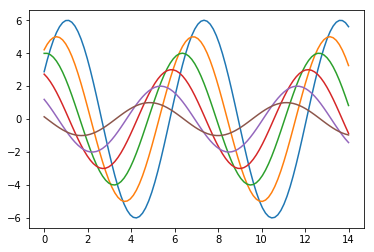

In [23]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sinplot()

In [24]:
sns.set()

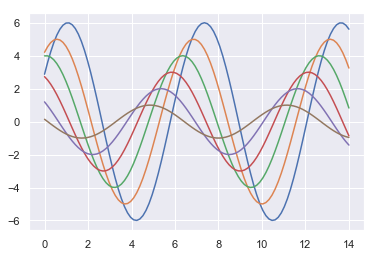

In [25]:
sinplot()

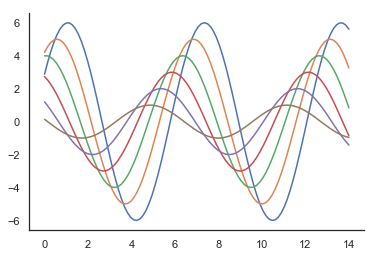

In [26]:
sns.set_style('white')
sinplot()
sns.despine()

<div class="alert alert-success">
    <b>EXERCISE:</b> Try out all different styles
</div>

* we can customise the style

In [27]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

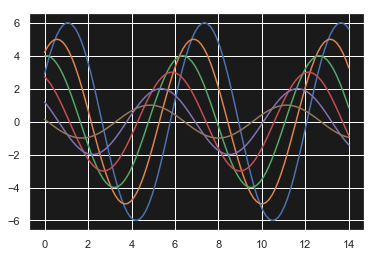

In [28]:
sns.set_style("darkgrid", {"axes.facecolor": "0.1"})  # background color from 0 to 1
sinplot()
sns.set_style("white")

## Plotting functions

* `sns.distplot()` combines a histogram, a kernel density estimate (KDE) and a rug plot
* `sns.rugplot()` plots a rug plot
* `sns.kdeplot()` plots a kde
* there is no sns.hist(), because it is already in plt

In [29]:
data = np.random.normal(size=100)

/Users/christiangeier/anaconda3/envs/geox/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


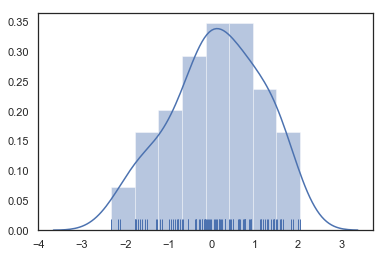

In [30]:
sns.distplot(data, kde=True, rug=True);

<div class="alert alert-success">
    <b>EXERCISE:</b> plot KDEs of `data` with different bandwiths (keyword argument `bw`) in one plot and label them apropriately.
    Test what the keyword argument `shade` does.
</div>

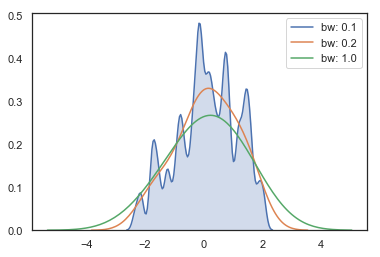

In [31]:
sns.set_style('white')
sns.kdeplot(data, bw=0.1, shade=True, label='bw: 0.1')
sns.kdeplot(data, bw=0.5, label="bw: 0.2")
sns.kdeplot(data, bw=1, label="bw: 1.0")
plt.legend();

* bivariate data can plotted `sns.joinplot(x, y)`, works nicely with Pandas' DataFrame

<div class="alert alert-success">
    <b>EXERCISE:</b>
    <li>Explore the different `kinds`</li>
    <li>how can you plot a 2-D histogram?</li>
    <li>what does kde's `n_level` do</li>
    <li>how can you combine a 2-D KDE and rugplots? (hints: you will need to create a figure and pass it to some seaborn functions; try keyword argument `vertical`)</li>
</div>

In [32]:
data1 = np.random.normal(scale=5, size=1000)
data2 = np.random.gamma(3, size=1000)


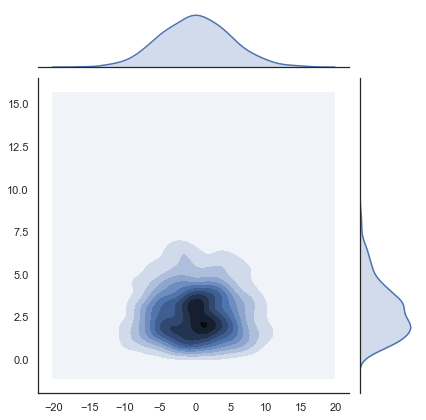

In [33]:
sns.jointplot(x=data1, y=data2, kind='kde');

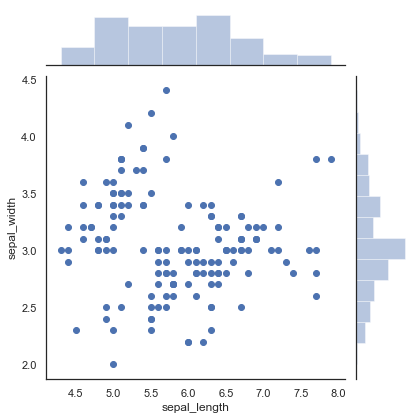

In [34]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris);

In [ ]:
plt.hist2d(data1, data2, bins=50);

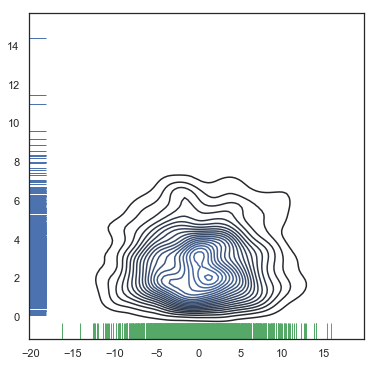

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data1, data2, ax=ax, n_levels=20)
sns.rugplot(data1, color="g", ax=ax)
sns.rugplot(data2, vertical=True, ax=ax);

In [36]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

* More complex plots can be achieved with using `joinplot()` and `JoinGrid` objects
* `pairplot()` plots pairwise relationships between data

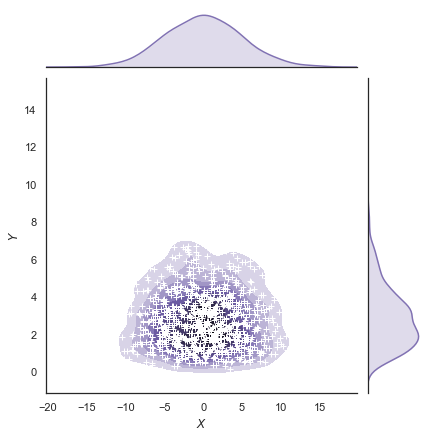

In [37]:
g = sns.jointplot(x=data1, y=data2, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

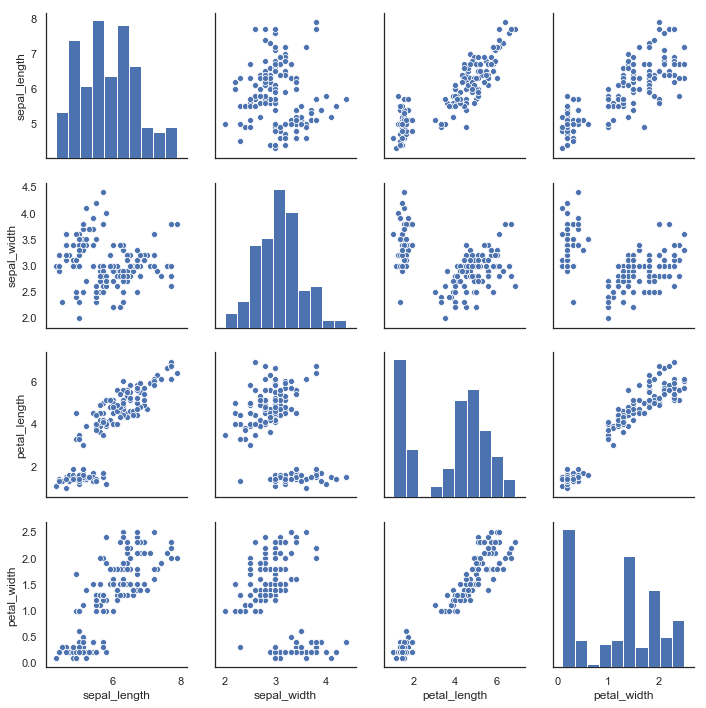

In [38]:
sns.pairplot(iris);

### Categorical Data
* for exploring categorical data, use `stripplot()`, `swarmplot()`, `boxplot()`, `violineplot()`
* often the `hue` keyword helps

In [ ]:
sns.stripplot(x='class', y='fare', jitter=True, hue='survived', data=titanic);

In [ ]:
sns.swarmplot(x='age', y='class', hue='sex', data=titanic);

In [ ]:
sns.boxplot(x="pclass", y="age", hue="survived", data=titanic);

In [ ]:
sns.violinplot(x="pclass", y="age", hue="survived", split=True, data=titanic);

<div class="alert alert-success">
    <b>EXERCISE:</b>
        have a look at the iris or diamond data set with the above mentioned functions

</div>

In [ ]:
sns.boxplot(x="species", y="petal_length", data=iris);

In [ ]:
sns.violinplot(x="color", y="carat", hue='cut', data=diamonds);

## Facet Plots
https://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial

* needs ["tidy"](http://vita.had.co.nz/papers/tidy-data.pdf) data
* allows easy plotting of different facets of your data

### Facet Grids

In [39]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


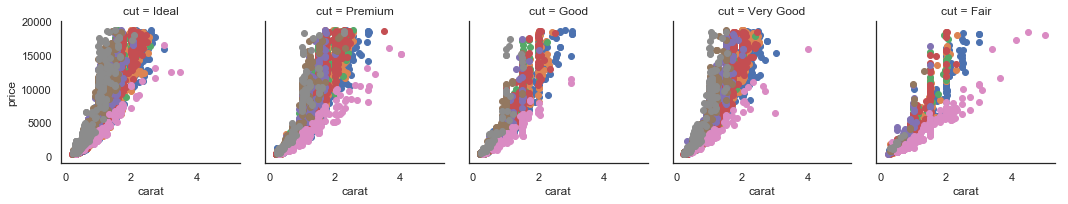

In [40]:
g = sns.FacetGrid(diamonds , col='cut', hue='clarity')
g.map(plt.scatter, 'carat', 'price');

In [ ]:
g = sns.FacetGrid(diamonds , col='cut', row='color', hue='clarity')
g.map(plt.scatter, 'carat', 'price');

In [ ]:
g = sns.FacetGrid(diamonds , col='cut')
g.map(sns.barplot, 'color', 'price', or);

In [ ]:
sns.FacetGrid(
    titanic.sort_values('deck'), col="class", sharex=False, gridspec_kws={"width_ratios": [5, 3, 3]}
).map(sns.boxplot, "deck", "age");

In [ ]:
g = sns.FacetGrid(titanic, hue="survived", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "age", "fare", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

### Pair Grids
allow quick visualization of different pairs of observations

In [ ]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();


<div class="alert alert-success">
    <b>EXERCISE:</b>
    <li>Plot the iris data set as a PairGrid, with a kdeplot on the diagonal, a scatter plot in the upper triangle and a kdeplot on the lower triangle (hint: `.map_upper()`, `.map_lower()`)</li>
   
</div>

In [ ]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

## Linear Relationships
* quick visualization of linear relationships with `.regplot()` and `.lmplot()`
* `regplot()` is more user friendly
* `lmplot()` is more powerful

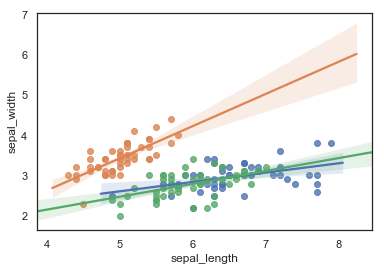

In [41]:
sns.regplot(x='sepal_length', y='sepal_width', data=iris[iris.species =='virginica']);
sns.regplot(x='sepal_length', y='sepal_width', data=iris[iris.species =='setosa']);
sns.regplot(x='sepal_length', y='sepal_width', data=iris[iris.species =='versicolor']);

In [ ]:
sns.regplot(x='pclass', y='fare', data=titanic, x_jitter=0.1);

In [ ]:
sns.regplot(x='pclass', y='fare', data=titanic, x_estimator=np.mean);

In [ ]:
sns.regplot(x='pclass', y='fare', data=titanic, x_estimator=np.mean, order=2);

In [ ]:
sns.lmplot(x='sepal_width', y='sepal_length', data=iris, hue='species');

In [ ]:
sns.lmplot(x='sepal_width', y='sepal_length', data=iris, hue='species', markers=['x', '+', '*']);

In [ ]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='reg');

# Quick Overview over more Python Plotting Tools
* [plotnine](https://plotnine.readthedocs.io/en/stable/): port of Hadley Wickhams ggpl2 ("grammar of graphics")
* [Altair](https://altair-viz.github.io/): declarative statistical visualization library for Python, based on Vega-Lite (Java Script)
* [Bokeh](http://bokeh.pydata.org/en/latest/): Interactive plotting for jupyter notebooks
* [plot.ly](https://plot.ly/): Interactive charts and dashboards
* [bqplot](https://github.com/bloomberg/bqplot): grammar of graphics for Jupyter notebooks